<a href="https://colab.research.google.com/github/alitasdln/machine-learning-tutorials/blob/main/pandas_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data = pd.read_csv('input/pokemon.csv')
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [3]:
country = ["Spain","France"]
population = ["11","12"]
list_label = ["country","population"]
list_col = [country,population]
zipped = list(zip(list_label,list_col))
data_dict = dict(zipped)
df = pd.DataFrame(data_dict)
df

,country,population
0,Spain,11
1,France,12


In [4]:
# Add new columns
df["capital"] = ["madrid","paris"]
df

,country,population,capital
0,Spain,11,madrid
1,France,12,paris


In [5]:


# Broadcasting
df["income"] = 0 #Broadcasting entire column
df



,country,population,capital,income
0,Spain,11,madrid,0
1,France,12,paris,0


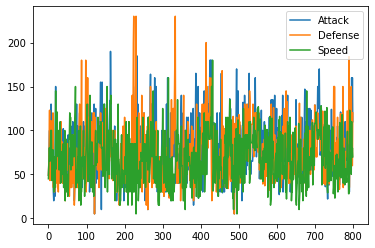

In [6]:
data1 = data.loc[:,["Attack","Defense","Speed"]]
data1.plot()
# it is confusing

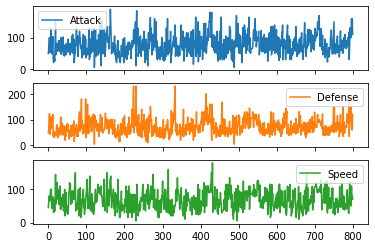

In [7]:
# subplots
data1.plot(subplots = True)
plt.show()

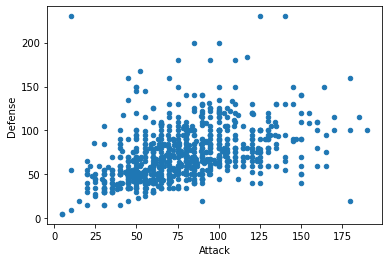

In [8]:
data1.plot(kind = "scatter",x="Attack",y = "Defense")
plt.show()

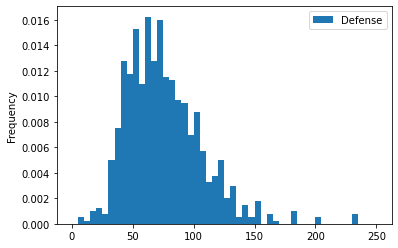

In [9]:
# hist plot  
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),density = True , stacked = True)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

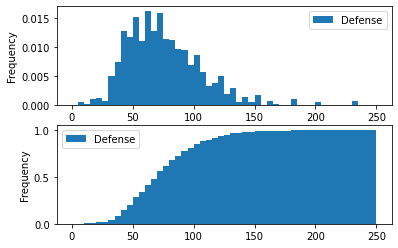

In [10]:


# histogram subplot with non cumulative and cumulative
fig, axes = plt.subplots(nrows=2,ncols=1)
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),density = True , stacked = True,ax = axes[0])
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),density = True , stacked = True,ax = axes[1],cumulative = True)
plt.savefig('graph.png')
plt



In [11]:
data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [12]:


time_list = ["1992-03-08","1992-04-12"]
print(type(time_list[1])) # As you can see date is string
# however we want it to be datetime object
datetime_object = pd.to_datetime(time_list)
print(type(datetime_object))



<class 'str'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [13]:
import warnings
warnings.filterwarnings("ignore")
# In order to practice lets take head of pokemon data and add it a time list
data2 = data.head()
date_list = ["1992-01-10","1992-02-10","1992-03-10","1993-03-15","1993-03-16"]
datetime_object = pd.to_datetime(date_list)
data2["date"] = datetime_object
# lets make date as index
data2= data2.set_index("date")
data2 

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-10,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1992-02-10,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
1992-03-10,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
1993-03-15,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
1993-03-16,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [14]:


# Now we can select according to our date index
print(data2.loc["1993-03-16"])
print(data2.loc["1992-03-10":"1993-03-16"])



#                      5
Name          Charmander
Type 1              Fire
Type 2               NaN
HP                    39
Attack                52
Defense               43
Sp. Atk               60
Sp. Def               50
Speed                 65
Generation             1
Legendary          False
Name: 1993-03-16 00:00:00, dtype: object
            #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
date                                                                        
1992-03-10  3       Venusaur  Grass  Poison  80      82       83      100   
1993-03-15  4  Mega Venusaur  Grass  Poison  80     100      123      122   
1993-03-16  5     Charmander   Fire     NaN  39      52       43       60   

            Sp. Def  Speed  Generation  Legendary  
date                                               
1992-03-10      100     80           1      False  
1993-03-15      120     80           1      False  
1993-03-16       50     65           1      False  


In [15]:


# We will use data2 that we create at previous part
data2.resample("A").mean()



,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-12-31,2.0,61.666667,64.333333,65.0,81.666667,81.666667,61.666667,1.0,0.0
1993-12-31,4.5,59.500000,76.000000,83.0,91.000000,85.000000,72.500000,1.0,0.0


In [16]:
# Lets resample with month
data2.resample("M").mean()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
1992-02-29,2.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0
1992-03-31,3.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
1992-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:


# In real life (data is real. Not created from us like data2) we can solve this problem with interpolate
# We can interpolete from first value
data2.resample("M").first().interpolate("linear")



,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-31,1.000000,Bulbasaur,Grass,Poison,45.0,49.0,49.000000,65.000000,65.000000,45.0,1.0,0.0
1992-02-29,2.000000,Ivysaur,Grass,Poison,60.0,62.0,63.000000,80.000000,80.000000,60.0,1.0,0.0
1992-03-31,3.000000,Venusaur,Grass,Poison,80.0,82.0,83.000000,100.000000,100.000000,80.0,1.0,0.0
1992-04-30,3.083333,None,None,None,80.0,83.5,86.333333,101.833333,101.666667,80.0,1.0,0.0
1992-05-31,3.166667,None,None,None,80.0,85.0,89.666667,103.666667,103.333333,80.0,1.0,0.0
1992-06-30,3.250000,None,None,None,80.0,86.5,93.000000,105.500000,105.000000,80.0,1.0,0.0
1992-07-31,3.333333,None,None,None,80.0,88.0,96.333333,107.333333,106.666667,80.0,1.0,0.0
1992-08-31,3.416667,None,None,None,80.0,89.5,99.666667,109.166667,108.333333,80.0,1.0,0.0
1992-09-30,3.500000,None,None,None,80.0,91.0,103.000000,111.000000,110.000000,80.0,1.0,0.0


In [18]:


# Or we can interpolate with mean()
data2.resample("M").mean().interpolate("linear")



,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.000,45.000000,49.0,49.0,65.00,65.00,45.000,1.0,0.0
1992-02-29,2.000,60.000000,62.0,63.0,80.00,80.00,60.000,1.0,0.0
1992-03-31,3.000,80.000000,82.0,83.0,100.00,100.00,80.000,1.0,0.0
1992-04-30,3.125,78.291667,81.5,83.0,99.25,98.75,79.375,1.0,0.0
1992-05-31,3.250,76.583333,81.0,83.0,98.50,97.50,78.750,1.0,0.0
1992-06-30,3.375,74.875000,80.5,83.0,97.75,96.25,78.125,1.0,0.0
1992-07-31,3.500,73.166667,80.0,83.0,97.00,95.00,77.500,1.0,0.0
1992-08-31,3.625,71.458333,79.5,83.0,96.25,93.75,76.875,1.0,0.0
1992-09-30,3.750,69.750000,79.0,83.0,95.50,92.50,76.250,1.0,0.0


In [19]:
# read data
data = pd.read_csv('input/pokemon.csv')
data= data.set_index("#")
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [20]:
data["HP"][1]

45

In [21]:
# using column attribute and row label
data.HP[1]

45

In [22]:


# using loc accessor
data.loc[1,["HP"]]



HP    45
Name: 1, dtype: object

In [23]:
# Selecting only some columns
data[["HP","Attack"]]

,HP,Attack
#,,
1,45,49
2,60,62
3,80,82
4,80,100
5,39,52
...,...,...
796,50,100
797,50,160
798,80,110


In [24]:
print(type(data["HP"]))     # series
print(type(data[["HP"]]))   # data frames

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [25]:
# Slicing and indexing series
data.loc[1:10,"HP":"Defense"]   # 10 and "Defense" are inclusive

,HP,Attack,Defense
#,,,
1,45,49,49
2,60,62,63
3,80,82,83
4,80,100,123
5,39,52,43
6,58,64,58
7,78,84,78
8,78,130,111
9,78,104,78


In [26]:
# Reverse slicing 
data.loc[10:1:-1,"HP":"Defense"] 

,HP,Attack,Defense
#,,,
10,44,48,65
9,78,104,78
8,78,130,111
7,78,84,78
6,58,64,58
5,39,52,43
4,80,100,123
3,80,82,83
2,60,62,63


In [27]:
# From something to end
data.loc[1:10,"Speed":] 

,Speed,Generation,Legendary
#,,,
1,45,1,False
2,60,1,False
3,80,1,False
4,80,1,False
5,65,1,False
6,80,1,False
7,100,1,False
8,100,1,False
9,100,1,False


In [28]:
# Creating boolean series
boolean = data.HP > 200
data[boolean]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
262,Blissey,Normal,NaN,255,10,10,75,135,55,2,False


In [29]:


# Combining filters
first_filter = data.HP > 150
second_filter = data.Speed > 35
data[first_filter & second_filter]



,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
262,Blissey,Normal,NaN,255,10,10,75,135,55,2,False
352,Wailord,Water,NaN,170,90,45,90,45,60,3,False
656,Alomomola,Water,NaN,165,75,80,40,45,65,5,False


In [30]:
# Filtering column based others
data.HP[data.Speed<15]

#
231     20
360     45
487     50
496    135
659     44
Name: HP, dtype: int64

In [31]:


# Plain python functions
def div(n):
    return n/2
data.HP.apply(div)



#
1      22.5
2      30.0
3      40.0
4      40.0
5      19.5
       ... 
796    25.0
797    25.0
798    40.0
799    40.0
800    40.0
Name: HP, Length: 800, dtype: float64

In [32]:


# Or we can use lambda function
data.HP.apply(lambda n : n/2)



#
1      22.5
2      30.0
3      40.0
4      40.0
5      19.5
       ... 
796    25.0
797    25.0
798    40.0
799    40.0
800    40.0
Name: HP, Length: 800, dtype: float64

In [33]:


# Defining column using other columns
data["total_power"] = data.Attack + data.Defense
data.head()



,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


In [34]:


# our index name is this:
print(data.index.name)
# lets change it
data.index.name = "index_name"
data.head()



#


,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
index_name,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


In [35]:
# if we want to modify index we need to change all of them.
data.head()
# first copy of our data to data3 then change index 
data3 = data.copy()
# lets make index start from 100. It is not remarkable change but it is just example
data3.index = range(100,900,1)
data3.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,total_power
100,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
101,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
102,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
103,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
104,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


In [36]:


# We can make one of the column as index. I actually did it at the beginning of manipulating data frames with pandas section
# It was like this
# data= data.set_index("#")
# also you can use 
# data.index = data["#"]



In [37]:


# lets read data frame one more time to start from beginning
data = pd.read_csv('input/pokemon.csv')
data.head()
# As you can see there is index. However we want to set one or more column to be index



,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [38]:
# Setting index : type 1 is outer type 2 is inner index
data1 = data.set_index(["Type 1","Type 2"]) 
data1.head(100)
# data1.loc["Fire","Flying"] # howw to use indexes

#           Name   HP  Attack  Defense  Sp. Atk  Sp. Def  \
Type 1 Type 2                                                               
Grass  Poison    1      Bulbasaur   45      49       49       65       65   
       Poison    2        Ivysaur   60      62       63       80       80   
       Poison    3       Venusaur   80      82       83      100      100   
       Poison    4  Mega Venusaur   80     100      123      122      120   
Fire   NaN       5     Charmander   39      52       43       60       50   
...            ...            ...  ...     ...      ...      ...      ...   
Poison NaN      96         Grimer   80      80       50       40       50   
       NaN      97            Muk  105     105       75       65      100   
Water  NaN      98       Shellder   30      65      100       45       25   
       Ice      99       Cloyster   50      95      180       85       45   
Ghost  Poison  100         Gastly   30      35       30      100       35   

               Speed  Generation  Legendary  
Type 1 Type 2                                
Grass  Poison     45           1      False  
       Poison     60           1      False  
       Poison     80           1      False  
       Poison     80           1      False  
Fire   NaN        65           1      False  
...              ...         ...        ...  
Poison NaN        25           1      False  
       NaN        50           1      False  
Water  NaN        40           1      False  
       Ice        70           1      False  
Ghost  Poison     80           1      False  

[100 rows x 10 columns]

In [39]:
dic = {"treatment":["A","A","B","B"],"gender":["F","M","F","M"],"response":[10,45,5,9],"age":[15,4,72,65]}
df = pd.DataFrame(dic)
df

,treatment,gender,response,age
0,A,F,10,15
1,A,M,45,4
2,B,F,5,72
3,B,M,9,65


In [40]:
# pivoting
df.pivot(index="treatment",columns = "gender",values="response")

gender,F,M
treatment,,
A,10,45
B,5,9


In [41]:
df1 = df.set_index(["treatment","gender"])
df1
# lets unstack it

response  age
treatment gender               
A         F             10   15
          M             45    4
B         F              5   72
          M              9   65

In [42]:


# level determines indexes
df1.unstack(level=0)



response    age    
treatment        A  B   A   B
gender                       
F               10  5  15  72
M               45  9   4  65

In [43]:
df1.unstack(level=1)

response     age    
gender           F   M   F   M
treatment                     
A               10  45  15   4
B                5   9  72  65

In [44]:
# change inner and outer level index position
df2 = df1.swaplevel(0,1)
df2

,,response,age
gender,treatment,,
F,A,10,15
M,A,45,4
F,B,5,72
M,B,9,65


In [45]:
df

,treatment,gender,response,age
0,A,F,10,15
1,A,M,45,4
2,B,F,5,72
3,B,M,9,65


In [46]:
# df.pivot(index="treatment",columns = "gender",values="response")
pd.melt(df,id_vars="treatment",value_vars=["age","response"])

,treatment,variable,value
0,A,age,15
1,A,age,4
2,B,age,72
3,B,age,65
4,A,response,10
5,A,response,45
6,B,response,5
7,B,response,9


In [47]:
# We will use df
df

,treatment,gender,response,age
0,A,F,10,15
1,A,M,45,4
2,B,F,5,72
3,B,M,9,65


In [48]:
# according to treatment take means of other features
df.groupby("treatment").mean()   # mean is aggregation / reduction method
# there are other methods like sum, std,max or min

,response,age
treatment,,
A,27.5,9.5
B,7.0,68.5


In [49]:
# we can only choose one of the feature
df.groupby("treatment").age.max() 

treatment
A    15
B    72
Name: age, dtype: int64

In [50]:
# Or we can choose multiple features
df.groupby("treatment")[["age","response"]].min() 

,age,response
treatment,,
A,4,10
B,65,5


In [51]:


df.info()
# as you can see gender is object
# However if we use groupby, we can convert it categorical data. 
# Because categorical data uses less memory, speed up operations like groupby
#df["gender"] = df["gender"].astype("category")
#df["treatment"] = df["treatment"].astype("category")
#df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   treatment  4 non-null      object
 1   gender     4 non-null      object
 2   response   4 non-null      int64 
 3   age        4 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 256.0+ bytes
